In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [3]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(keys='date', inplace=True)

def create_stock_df_of_company(company_code):
    url = f'http://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [12]:
apple_df = create_stock_df_of_company('aapl')

apple_df.head(3)

apple_df[['close', 'high', 'low', 'open', 'symbol', 'volume', 'id',
'key', 'subkey', 'updated', 'changeOverTime',
'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh', 'uLow',
'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume',
'label', 'change', 'changePercent'
]].head(3)

apple_df = apple_df[sorted(apple_df.columns)]

apple_df.head(3)

,change,changeOverTime,changePercent,close,company_code,fClose,fHigh,fLow,fOpen,fVolume,...,open,subkey,symbol,uClose,uHigh,uLow,uOpen,uVolume,updated,volume
date,,,,,,,,,,,,,,,,,,,,,
2020-10-19,0.00,0.000000,0.0000,115.98,aapl,115.7803,120.2116,115.4608,119.7534,120639337,...,119.96,,AAPL,115.98,120.419,115.66,119.96,120639337,1606830572000,120639337
2020-10-20,1.53,0.013192,0.0132,117.51,aapl,117.3076,118.7751,115.4309,115.9999,124423728,...,116.20,,AAPL,117.51,118.980,115.63,116.20,124423728,1606830572000,124423728
2020-10-21,-0.64,0.007674,-0.0054,116.87,aapl,116.6687,118.5006,116.2494,116.4691,89945980,...,116.67,,AAPL,116.87,118.705,116.45,116.67,89945980,1606830572000,89945980


<AxesSubplot:xlabel='date'>

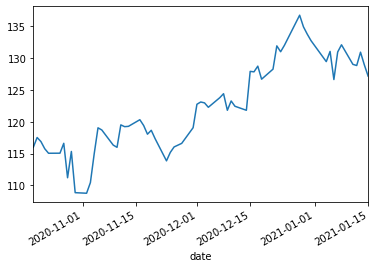

In [5]:
apple_df['close'].plot(kind='line')

<AxesSubplot:xlabel='date'>

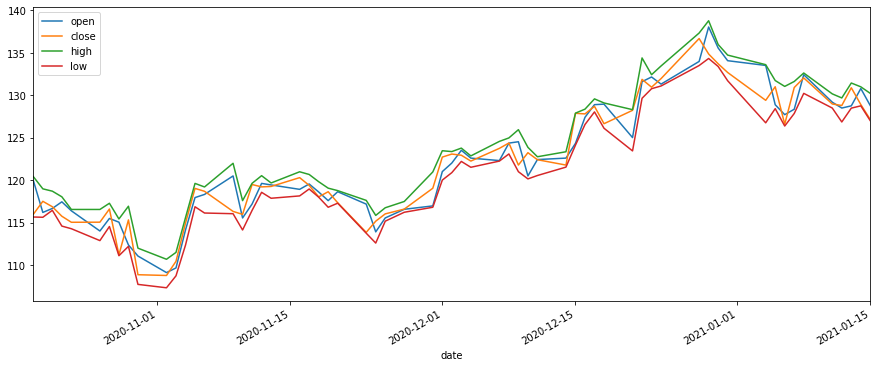

In [6]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6))

In [7]:
apple_df.columns

Index(['change', 'changeOverTime', 'changePercent', 'close', 'company_code',
       'fClose', 'fHigh', 'fLow', 'fOpen', 'fVolume', 'high', 'id', 'key',
       'label', 'low', 'marketChangeOverTime', 'open', 'subkey', 'symbol',
       'uClose', 'uHigh', 'uLow', 'uOpen', 'uVolume', 'updated', 'volume'],
      dtype='object')

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())